<a href="https://colab.research.google.com/github/arman-hossain-git/admissions/blob/main/Conversion_from_Contacts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conversion from Contacts and ISIR & Regular Applications**

Objectives:

a. Conversion from Contacts
1. Clean the data
2. Analyze depending on vital demographic fields
3. Find conversion
4. Look for the conversion dependencies on demographic fields

b. Conversion from ISIR & Application
1. Clean the data
2. Analyze depending on vital demographic fields
3. Find conversion
4. Look for the conversion dependencies on demographic fields



**a. Conversion from Contacts**

In [ ]:
import pandas as pd

cdata_url = 'https://raw.githubusercontent.com/arman-hossain-git/admissions/main/data/Contacts.csv'
dfc = pd.read_csv(cdata_url)

dfc.head()


<ipython-input-1-4a83da542a4f>:4: DtypeWarning: Columns (24,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  dfc = pd.read_csv(cdata_url)


,contactId,contactTypeId,staffId,city,state,campusCode,lastUpdateDtTm,creationDtTm,contactStatus,studentId,...,ST_remarks,PROGRAM_OF_INTEREST,LAST_GRADE_COMPLETED,HIGHEST_LEVEL_OF_EDUCATION,HIGH_SCHOOL,LEAD_SOURCE_1,LEAD_SOURCE_2,LEAD_SOURCE_3,BIRTH_DATE,CUSTOM_GENDER
0,4010919,4000039,4000285,NaN,NaN,34606,9/11/2023 8:50,1/1/2017 14:03,Vendor,NaN,...,NaN,NaN,8th,NaN,NaN,NaN,NaN,NaN,2/16/1997,NaN
1,4026852,4000052,4000285,NaN,NaN,34652,9/11/2023 8:40,11/9/2017 15:33,Salon Customer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
2,4010918,4000039,4000285,Brooksville,FL,34652,9/11/2023 8:43,12/30/2016 7:59,Vendor,NaN,...,NaN,NaN,12th,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4032589,4000052,4000285,NaN,NaN,-1,9/11/2023 8:45,6/13/2018 16:56,Salon Customer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female
4,4026853,4000052,4000285,NaN,NaN,34606,9/11/2023 8:41,11/9/2017 15:42,Salon Customer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female


In [ ]:
# Convert date columns to datetime format
# Fill missing values  for required columns

dates = ['lastUpdateDtTm', 'creationDtTm', 'student_creationDtTm', 'Conversion_Date', 'registration_creationDtTm', 'registration_StartDate', 'registration_EndDate', 'registration_GraduationDate', 'BIRTH_DATE']
for col in dates:
    dfc[col] = pd.to_datetime(dfc[col], errors='coerce')


req = ['city', 'state', 'PROGRAM_OF_INTEREST', 'LAST_GRADE_COMPLETED', 'HIGHEST_LEVEL_OF_EDUCATION', 'HIGH_SCHOOL', 'LEAD_SOURCE_1', 'LEAD_SOURCE_2', 'LEAD_SOURCE_3', 'CUSTOM_GENDER']
for col in req:
  dfc[col] = dfc[col].fillna('UNSPECIFIED')


In [ ]:
dfc.head()

,contactId,contactTypeId,staffId,city,state,campusCode,lastUpdateDtTm,creationDtTm,contactStatus,studentId,...,ST_remarks,PROGRAM_OF_INTEREST,LAST_GRADE_COMPLETED,HIGHEST_LEVEL_OF_EDUCATION,HIGH_SCHOOL,LEAD_SOURCE_1,LEAD_SOURCE_2,LEAD_SOURCE_3,BIRTH_DATE,CUSTOM_GENDER
0,4010919,4000039,4000285,UNSPECIFIED,UNSPECIFIED,34606,2023-09-11 08:50:00,2017-01-01 14:03:00,Vendor,NaN,...,NaN,UNSPECIFIED,8th,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,1997-02-16,UNSPECIFIED
1,4026852,4000052,4000285,UNSPECIFIED,UNSPECIFIED,34652,2023-09-11 08:40:00,2017-11-09 15:33:00,Salon Customer,NaN,...,NaN,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,Male
2,4010918,4000039,4000285,Brooksville,FL,34652,2023-09-11 08:43:00,2016-12-30 07:59:00,Vendor,NaN,...,NaN,UNSPECIFIED,12th,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,UNSPECIFIED
3,4032589,4000052,4000285,UNSPECIFIED,UNSPECIFIED,-1,2023-09-11 08:45:00,2018-06-13 16:56:00,Salon Customer,NaN,...,NaN,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,Female
4,4026853,4000052,4000285,UNSPECIFIED,UNSPECIFIED,34606,2023-09-11 08:41:00,2017-11-09 15:42:00,Salon Customer,NaN,...,NaN,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,Female


In [ ]:
# Create a new column for campusCode

# Reference
# campusCode = 34652 --> Campus = 1. NEW PORT RICHEY
# campusCode = 34601 --> Campus = 2. BROOKSVILLE
# campusCode = 34606 --> Campus = 3. SPRING HILL

def campus(code):
  if code == 34652:
    return '1. NEW PORT RICHEY'
  elif code == 34601:
    return '2. BROOKSVILLE'
  elif code == 34606:
    return '3. SPRING HILL'
  elif code == -1:
    return 'UNSPECIFIED'
  else:
    'UNSPECIFIED'

dfc['campus'] = dfc['campusCode'].apply(campus)
dfc[['campusCode', 'campus']].head()

,campusCode,campus
0,34606,3. SPRING HILL
1,34652,1. NEW PORT RICHEY
2,34652,1. NEW PORT RICHEY
3,-1,UNSPECIFIED
4,34606,3. SPRING HILL


In [ ]:
dfc['campus'].value_counts()

,count
campus,
1. NEW PORT RICHEY,19105
3. SPRING HILL,3958
UNSPECIFIED,3788
2. BROOKSVILLE,3691


In [ ]:
# Create a new column for Program_of_Interest

# For all empty/null/NaN value in column PROGRAM_OF_INTEREST we want 'UNSPECIFIED'
# else the upper case of the original field

def null_prog(program):
  if pd.isna(program) or program == '':
    return 'UNSPECIFIED'
  else:
    return program.upper()

dfc['interested_program'] = dfc['PROGRAM_OF_INTEREST'].apply(null_prog)
dfc[['PROGRAM_OF_INTEREST', 'interested_program']].tail()

,PROGRAM_OF_INTEREST,interested_program
30537,Full Specialty,FULL SPECIALTY
30538,Cosmetology,COSMETOLOGY
30539,Skin Care,SKIN CARE
30540,Nails,NAILS
30541,Cosmetology,COSMETOLOGY


In [ ]:
dfc['interested_program'].value_counts()

,count
interested_program,
UNSPECIFIED,28825
COSMETOLOGY,405
NAILS,343
SKIN CARE,275
FULL SPECIALTY,203
MASSAGE,168
BARBER STYLIST,131
RESTRICTED BARBER,89
BARBER,71


In [ ]:
dfc.head()

,contactId,contactTypeId,staffId,city,state,campusCode,lastUpdateDtTm,creationDtTm,contactStatus,studentId,...,LAST_GRADE_COMPLETED,HIGHEST_LEVEL_OF_EDUCATION,HIGH_SCHOOL,LEAD_SOURCE_1,LEAD_SOURCE_2,LEAD_SOURCE_3,BIRTH_DATE,CUSTOM_GENDER,campus,interested_program
0,4010919,4000039,4000285,UNSPECIFIED,UNSPECIFIED,34606,2023-09-11 08:50:00,2017-01-01 14:03:00,Vendor,NaN,...,8th,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,1997-02-16,UNSPECIFIED,3. SPRING HILL,UNSPECIFIED
1,4026852,4000052,4000285,UNSPECIFIED,UNSPECIFIED,34652,2023-09-11 08:40:00,2017-11-09 15:33:00,Salon Customer,NaN,...,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,Male,1. NEW PORT RICHEY,UNSPECIFIED
2,4010918,4000039,4000285,Brooksville,FL,34652,2023-09-11 08:43:00,2016-12-30 07:59:00,Vendor,NaN,...,12th,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,UNSPECIFIED,1. NEW PORT RICHEY,UNSPECIFIED
3,4032589,4000052,4000285,UNSPECIFIED,UNSPECIFIED,-1,2023-09-11 08:45:00,2018-06-13 16:56:00,Salon Customer,NaN,...,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,Female,UNSPECIFIED,UNSPECIFIED
4,4026853,4000052,4000285,UNSPECIFIED,UNSPECIFIED,34606,2023-09-11 08:41:00,2017-11-09 15:42:00,Salon Customer,NaN,...,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,Female,3. SPRING HILL,UNSPECIFIED


In [ ]:
# Create a single lead_source column combining all 3 lead_sources(1,2,3)

def lead_source(a):
  if pd.isna(a['LEAD_SOURCE_1']) or a['LEAD_SOURCE_1'] == '':
    if pd.isna(a['LEAD_SOURCE_2']) or a['LEAD_SOURCE_2'] == '':
      if pd.isna(a['LEAD_SOURCE_3']) or a['LEAD_SOURCE_3'] == '':
        return 'UNSPECIFIED'
      else:
        return a['LEAD_SOURCE_3']
    else:
      return a['LEAD_SOURCE_2']
  else:
    return a['LEAD_SOURCE_1']

dfc['lead_source'] = dfc.apply(lead_source, axis = 1)

dfc[['LEAD_SOURCE_1', 'LEAD_SOURCE_2', 'LEAD_SOURCE_3', 'lead_source']].head()

,LEAD_SOURCE_1,LEAD_SOURCE_2,LEAD_SOURCE_3,lead_source
0,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED
1,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED
2,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED
3,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED
4,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED


In [ ]:
dfc['lead_source'].value_counts()

,count
lead_source,
UNSPECIFIED,29858
Google/Bing,245
Website,181
Friend Referral,166
Other,64
Facebook,14
Walk-in,12
Newspaper,1
Direct Mail,1


In [ ]:
# Create a new column for gender

# For all empty/null/NaN value in column CUSTOM_GENDER we want 'UNSPECIFIED'
# else the upper case of the original field

def null_gender(sex):
  if pd.isna(sex) or sex == '':
    return 'UNSPECIFIED'
  else:
    return sex.upper()

dfc['gender'] = dfc['CUSTOM_GENDER'].apply(null_gender)
dfc[['CUSTOM_GENDER', 'gender']].tail()

,CUSTOM_GENDER,gender
30537,UNSPECIFIED,UNSPECIFIED
30538,UNSPECIFIED,UNSPECIFIED
30539,UNSPECIFIED,UNSPECIFIED
30540,UNSPECIFIED,UNSPECIFIED
30541,UNSPECIFIED,UNSPECIFIED


In [ ]:
dfc['gender'].value_counts()

,count
gender,
UNSPECIFIED,20211
FEMALE,6586
MALE,3745


In [ ]:
dfc.columns

Index(['contactId', 'contactTypeId', 'staffId', 'city', 'state', 'campusCode',
       'lastUpdateDtTm', 'creationDtTm', 'contactStatus', 'studentId',
       'studentStatus', 'Enroll_Type', 'student_creationDtTm',
       'Conversion_Date', 'registration_creationDtTm',
       'registration_StartDate', 'registration_EndDate',
       'registration_GraduationDate', 'registration_ID',
       'registration_Session', 'Department_Name', 'Registration_studentCampus',
       'Started_Program_Code', 'Started_Program_Name', 'Enrolled_Semester',
       'Current_Registration_Status', 'ST_remarks', 'PROGRAM_OF_INTEREST',
       'LAST_GRADE_COMPLETED', 'HIGHEST_LEVEL_OF_EDUCATION', 'HIGH_SCHOOL',
       'LEAD_SOURCE_1', 'LEAD_SOURCE_2', 'LEAD_SOURCE_3', 'BIRTH_DATE',
       'CUSTOM_GENDER', 'campus', 'interested_program', 'lead_source',
       'gender'],
      dtype='object')

In [ ]:
# Show some basic statistic for the categorical columns for all contacts

categorical_columns = ['campus', 'gender', 'interested_program', 'lead_source', 'LAST_GRADE_COMPLETED', 'HIGHEST_LEVEL_OF_EDUCATION']
categorical_stats = dfc[categorical_columns].describe()
categorical_stats

,campus,gender,interested_program,lead_source,LAST_GRADE_COMPLETED,HIGHEST_LEVEL_OF_EDUCATION
count,30542,30542,30542,30542,30542,30542
unique,4,3,12,9,6,5
top,1. NEW PORT RICHEY,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED
freq,19105,20211,28825,29858,29384,30291


In [ ]:
# Find the actual conversion count after '2020-01-01'

distinct_count = dfc[(dfc['studentId'].notnull()) & (dfc['ST_remarks'].str.contains(r'This student is created from the contact record \( id: ', na=False)) & (dfc['creationDtTm'] >= '2020-01-01')]['contactId'].nunique()

# Display the count
distinct_count


43

In [ ]:
# Number of total unique contacts after '2020-01-01'

total_contacts = dfc[dfc['creationDtTm'] >= '2020-01-01']['contactId'].nunique()
total_contacts

2270

In [ ]:
# Conversion rate

distinct_count/total_contacts*100

1.8942731277533038

In [ ]:
# Function to calculate counts and rates
def calculate_behavior(data, column):
    counts = data[column].value_counts()
    rates = (counts / counts.sum()) * 100
    return counts, rates

# Create a sub dataframe for the conversions
sub_df = dfc[(dfc['studentId'].notnull()) & (dfc['ST_remarks'].str.contains(r'This student is created from the contact record \( id: ', na=False)) & (dfc['creationDtTm'] >= '2020-01-01')]

In [ ]:
# Campus
campus_counts, campus_rates = calculate_behavior(sub_df, 'campus')

print("Campus Behavior:")
print(campus_counts)
print(campus_rates)

Campus Behavior:
campus
1. NEW PORT RICHEY    26
2. BROOKSVILLE        16
UNSPECIFIED            1
Name: count, dtype: int64
campus
1. NEW PORT RICHEY    60.465116
2. BROOKSVILLE        37.209302
UNSPECIFIED            2.325581
Name: count, dtype: float64


In [ ]:
# Lead Source
lead_source_counts, lead_source_rates = calculate_behavior(sub_df, 'lead_source')

print("\nLead Source Behavior:")
print(lead_source_counts)
print(lead_source_rates)


Lead Source Behavior:
lead_source
Google/Bing        17
UNSPECIFIED        13
Friend Referral     9
Website             2
Other               2
Name: count, dtype: int64
lead_source
Google/Bing        39.534884
UNSPECIFIED        30.232558
Friend Referral    20.930233
Website             4.651163
Other               4.651163
Name: count, dtype: float64


In [ ]:
# Program of Interest
interested_program_counts, interested_program_rates = calculate_behavior(sub_df, 'interested_program')

print("\nProgram of Interest Behavior:")
print(interested_program_counts)
print(interested_program_rates)


Program of Interest Behavior:
interested_program
NAILS                14
SKIN CARE            10
COSMETOLOGY           7
UNSPECIFIED           4
BARBER                3
FULL SPECIALTY        2
BARBER STYLIST        1
MASSAGE               1
RESTRICTED BARBER     1
Name: count, dtype: int64
interested_program
NAILS                32.558140
SKIN CARE            23.255814
COSMETOLOGY          16.279070
UNSPECIFIED           9.302326
BARBER                6.976744
FULL SPECIALTY        4.651163
BARBER STYLIST        2.325581
MASSAGE               2.325581
RESTRICTED BARBER     2.325581
Name: count, dtype: float64


In [ ]:
# Gender
gender_counts, gender_rates = calculate_behavior(sub_df, 'gender')

print("\nGender Behavior:")
print(gender_counts)
print(gender_rates)


Gender Behavior:
gender
UNSPECIFIED    43
Name: count, dtype: int64
gender
UNSPECIFIED    100.0
Name: count, dtype: float64


In [ ]:
# City
city_counts, city_rates = calculate_behavior(sub_df, 'city')

print("\nCity Behavior:")
print(city_counts)
print(city_rates)


City Behavior:
city
UNSPECIFIED         16
Springhill           5
Brooksville          4
Hudson               3
Inverness            2
Spring Hill          2
Port Richey          2
Homosassa            1
New port Richey      1
Holiday              1
spring hill          1
Hudson               1
Spring hill          1
New Port Richey      1
Port Richey          1
Weeki Wachee         1
Name: count, dtype: int64
city
UNSPECIFIED         37.209302
Springhill          11.627907
Brooksville          9.302326
Hudson               6.976744
Inverness            4.651163
Spring Hill          4.651163
Port Richey          4.651163
Homosassa            2.325581
New port Richey      2.325581
Holiday              2.325581
spring hill          2.325581
Hudson               2.325581
Spring hill          2.325581
New Port Richey      2.325581
Port Richey          2.325581
Weeki Wachee         2.325581
Name: count, dtype: float64


In [ ]:
# State
state_counts, state_rates = calculate_behavior(sub_df, 'state')

print("\nState Behavior:")
print(state_counts)
print(state_rates)


State Behavior:
state
UNSPECIFIED    28
Fl             13
FL              2
Name: count, dtype: int64
state
UNSPECIFIED    65.116279
Fl             30.232558
FL              4.651163
Name: count, dtype: float64


In [ ]:
# Last Grade Completed
grade_counts, grade_rates = calculate_behavior(sub_df, 'LAST_GRADE_COMPLETED')

print("\nLast Grade Completed Behavior:")
print(grade_counts)
print(grade_rates)


Last Grade Completed Behavior:
LAST_GRADE_COMPLETED
12th           34
UNSPECIFIED     5
11th            3
10th            1
Name: count, dtype: int64
LAST_GRADE_COMPLETED
12th           79.069767
UNSPECIFIED    11.627907
11th            6.976744
10th            2.325581
Name: count, dtype: float64


In [ ]:
# Highest Level of Education
highest_level_counts, highest_level_rates = calculate_behavior(sub_df, 'HIGHEST_LEVEL_OF_EDUCATION')

print("\nHighest Level of Education Behavior:")
print(highest_level_counts)
print(highest_level_rates)


Highest Level of Education Behavior:
HIGHEST_LEVEL_OF_EDUCATION
UNSPECIFIED          25
HS Diploma           14
GED                   3
None of the Above     1
Name: count, dtype: int64
HIGHEST_LEVEL_OF_EDUCATION
UNSPECIFIED          58.139535
HS Diploma           32.558140
GED                   6.976744
None of the Above     2.325581
Name: count, dtype: float64


In [ ]:
## Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Function to create pie charts
def create_pie_chart(ax, data, title):
    wedges, texts, autotexts = ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    for autotext in autotexts:
        autotext.set_color('white')
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Function to create bar charts
def create_bar_chart(ax, data, title, height=0.5):
  sns.barplot(x=data.index, y=data.values, ax=ax, palette="pastel", ci=None)
  ax.set_title(title)
  ax.set_ylabel('Count')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
  ax.set_ylim(0, max(data.values) * height)

<ipython-input-27-a5fc262c66ae>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=ax, palette="pastel", ci=None)
<ipython-input-27-a5fc262c66ae>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=ax, palette="pastel", ci=None)
<ipython-input-27-a5fc262c66ae>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-27-a5fc262c66ae>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data.index, y=data.values, ax=ax, palette="pastel", ci=None)
<ipython-input-27-a5fc262c66ae>:16: FutureWarning: 

Passing

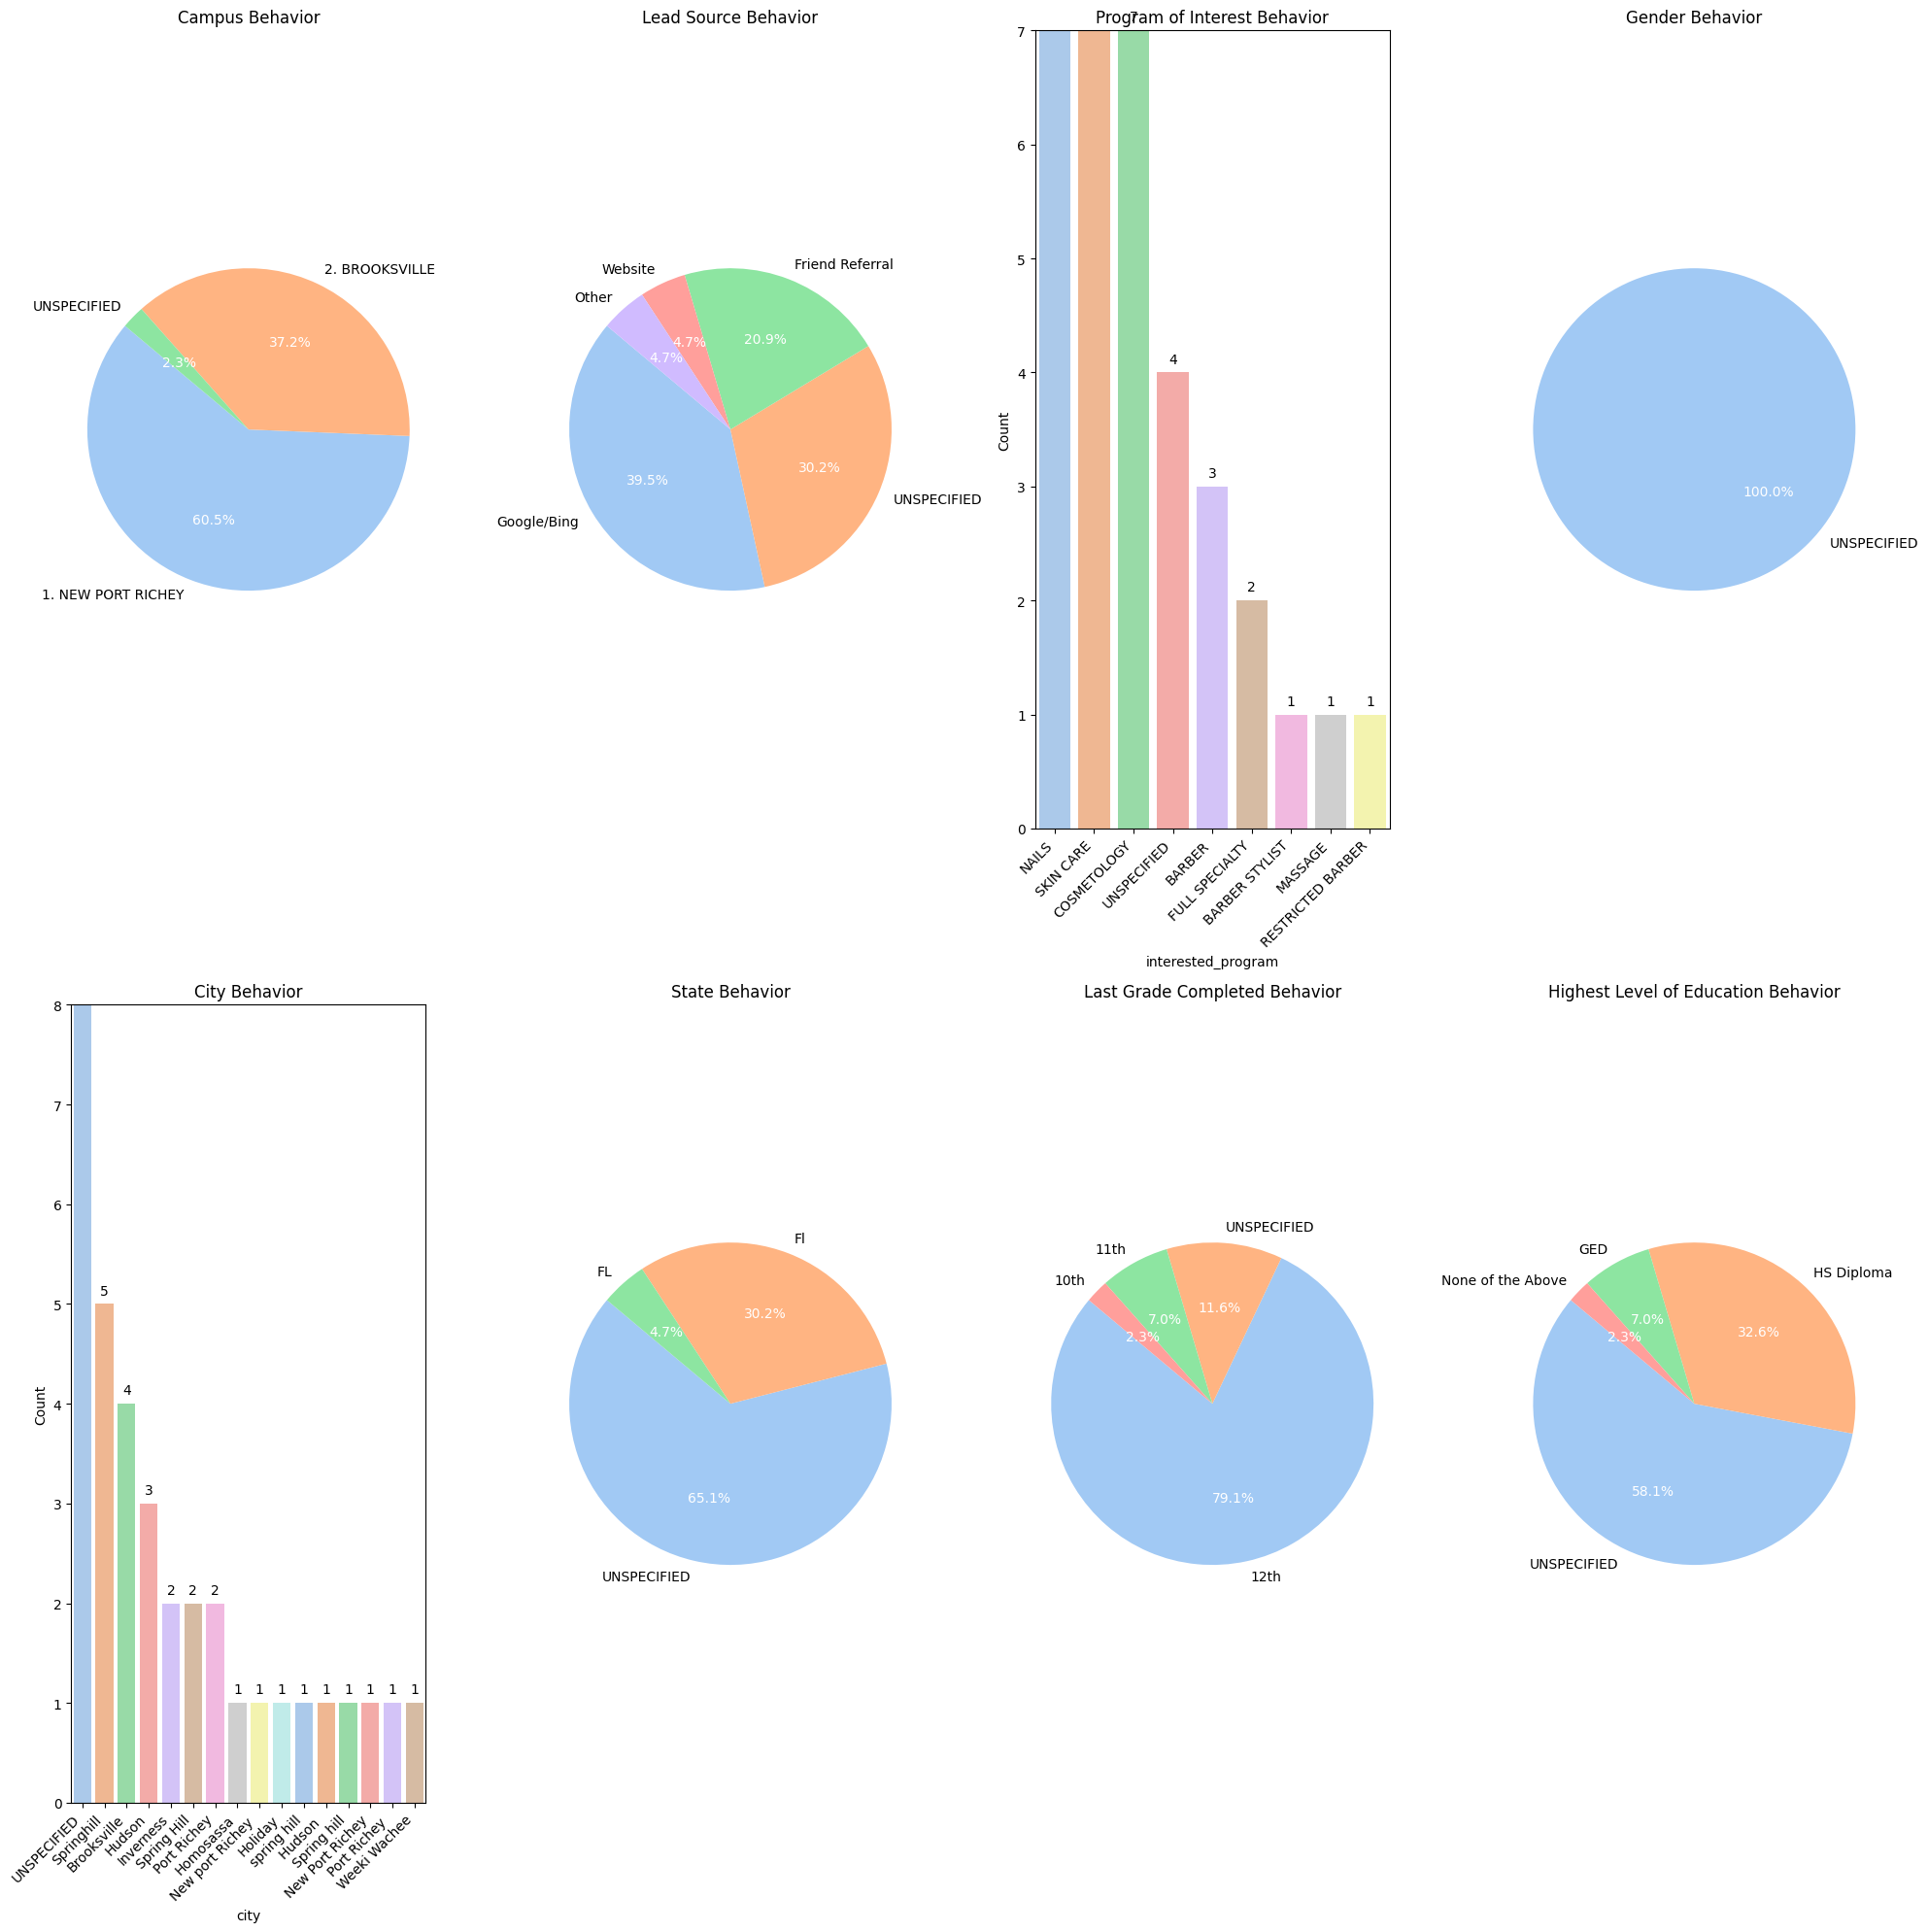

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(20, 20))

# Campus Behavior Pie Chart
create_pie_chart(axs[0, 0], campus_counts, 'Campus Behavior')

# Lead Source Behavior Bar Chart
create_pie_chart(axs[0, 1], lead_source_counts, 'Lead Source Behavior')

# Program of Interest Behavior Bar Chart
create_bar_chart(axs[0, 2], interested_program_counts, 'Program of Interest Behavior')

# Gender Behavior Pie Chart
create_pie_chart(axs[0, 3], gender_counts, 'Gender Behavior')

# City Behavior Bar Chart
create_bar_chart(axs[1, 0], city_counts, 'City Behavior')

# State Behavior Pie Chart
create_pie_chart(axs[1, 1], state_counts, 'State Behavior')

# Last Grade Completed Behavior Pie Chart
create_pie_chart(axs[1, 2], grade_counts, 'Last Grade Completed Behavior')

# Highest Level of Education Behavior Pie Chart
create_pie_chart(axs[1, 3], highest_level_counts, 'Highest Level of Education Behavior')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Filter data for creationDtTm >= '2020-01-01'
year_filter = dfc[dfc['creationDtTm'] >= '2020-01-01']

In [ ]:
year_filter['year'] = year_filter['creationDtTm'].dt.year

<ipython-input-30-01d32a977f66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_filter['year'] = year_filter['creationDtTm'].dt.year


In [ ]:
year_filter.columns

Index(['contactId', 'contactTypeId', 'staffId', 'city', 'state', 'campusCode',
       'lastUpdateDtTm', 'creationDtTm', 'contactStatus', 'studentId',
       'studentStatus', 'Enroll_Type', 'student_creationDtTm',
       'Conversion_Date', 'registration_creationDtTm',
       'registration_StartDate', 'registration_EndDate',
       'registration_GraduationDate', 'registration_ID',
       'registration_Session', 'Department_Name', 'Registration_studentCampus',
       'Started_Program_Code', 'Started_Program_Name', 'Enrolled_Semester',
       'Current_Registration_Status', 'ST_remarks', 'PROGRAM_OF_INTEREST',
       'LAST_GRADE_COMPLETED', 'HIGHEST_LEVEL_OF_EDUCATION', 'HIGH_SCHOOL',
       'LEAD_SOURCE_1', 'LEAD_SOURCE_2', 'LEAD_SOURCE_3', 'BIRTH_DATE',
       'CUSTOM_GENDER', 'campus', 'interested_program', 'lead_source',
       'gender', 'year'],
      dtype='object')

In [ ]:
year_filter.head()

,contactId,contactTypeId,staffId,city,state,campusCode,lastUpdateDtTm,creationDtTm,contactStatus,studentId,...,LEAD_SOURCE_1,LEAD_SOURCE_2,LEAD_SOURCE_3,BIRTH_DATE,CUSTOM_GENDER,campus,interested_program,lead_source,gender,year
24,4049125,4000050,4000398,Crystal River,UNSPECIFIED,34601,2024-08-21 12:39:00,2024-03-20 09:22:00,86. Lost - Not Interested,NaN,...,Friend Referral,UNSPECIFIED,UNSPECIFIED,2007-04-20,UNSPECIFIED,2. BROOKSVILLE,COSMETOLOGY,Friend Referral,UNSPECIFIED,2024
25,4049925,4000050,4000398,UNSPECIFIED,UNSPECIFIED,34601,2024-09-24 13:21:00,2024-06-20 19:22:00,86. Lost - Not Interested,NaN,...,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,UNSPECIFIED,2. BROOKSVILLE,SKIN CARE,UNSPECIFIED,UNSPECIFIED,2024
26,4049926,4000050,4000398,UNSPECIFIED,UNSPECIFIED,34601,2024-09-24 13:21:00,2024-06-20 21:56:00,86. Lost - Not Interested,NaN,...,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,UNSPECIFIED,2. BROOKSVILLE,SKIN CARE,UNSPECIFIED,UNSPECIFIED,2024
27,4049928,4000046,4000398,BROOKSVILLE,FL,34601,2024-08-19 07:30:00,2024-06-21 04:32:00,Enrolled student,4051665.0,...,Google/Bing,UNSPECIFIED,UNSPECIFIED,NaT,UNSPECIFIED,2. BROOKSVILLE,SKIN CARE,Google/Bing,UNSPECIFIED,2024
28,4049849,4000050,4000285,UNSPECIFIED,UNSPECIFIED,34652,2024-06-26 08:19:00,2024-06-11 14:56:00,86. Lost - Not Interested,NaN,...,UNSPECIFIED,UNSPECIFIED,UNSPECIFIED,NaT,UNSPECIFIED,1. NEW PORT RICHEY,NAILS,UNSPECIFIED,UNSPECIFIED,2024


In [ ]:
year_filter['year'].min()

2020

In [ ]:
year_filter['year'].max()

2024

In [ ]:
year_group = year_filter.groupby(['interested_program', 'year'])['contactId'].nunique().unstack(fill_value=0)

In [ ]:
year_group.head()

year,2020,2021,2022,2023,2024
interested_program,,,,,
BARBER,2,2,5,28,23
BARBER STYLIST,0,0,0,1,130
COSMETOLOGY,2,9,5,31,347
COSMETOLOGY AND BARBER,2,0,0,2,2
FULL SPECIALTY,1,3,7,21,168


In [ ]:
for year in range(year_group.columns.min() + 1, year_group.columns.max() + 1):
   year_group[f'{year} YOY%'] = ((year_group[year] - year_group[year - 1]) / year_group[year - 1]) * 100

In [ ]:
year_group.loc['Total'] = year_group.sum()

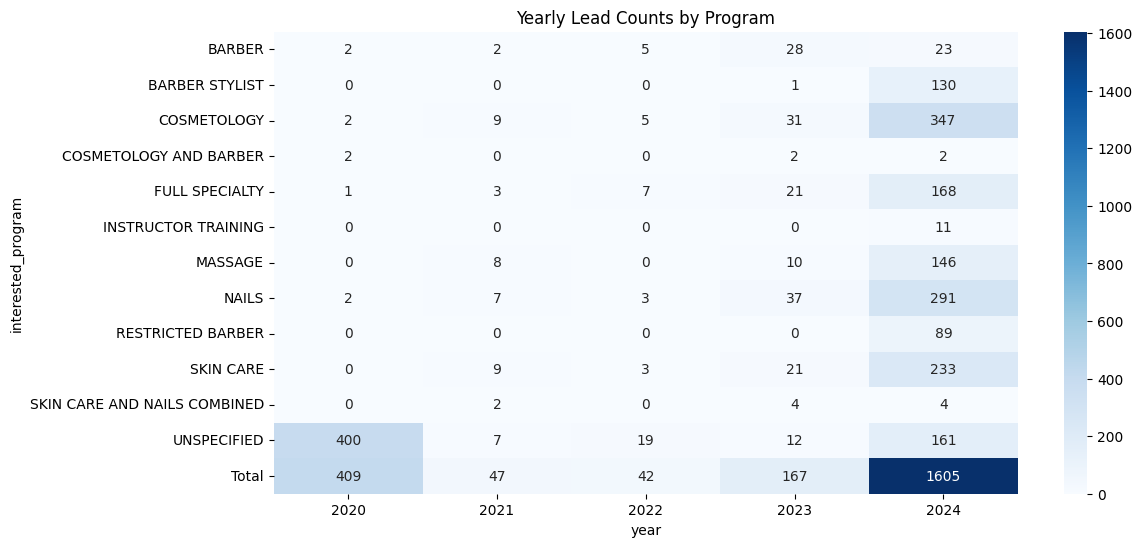

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(year_group.loc[:, ~year_group.columns.map(str).str.endswith('YOY%')].fillna(0),
            annot=True, fmt=".0f", cmap="Blues", cbar=True)
plt.title("Yearly Lead Counts by Program")
plt.show()

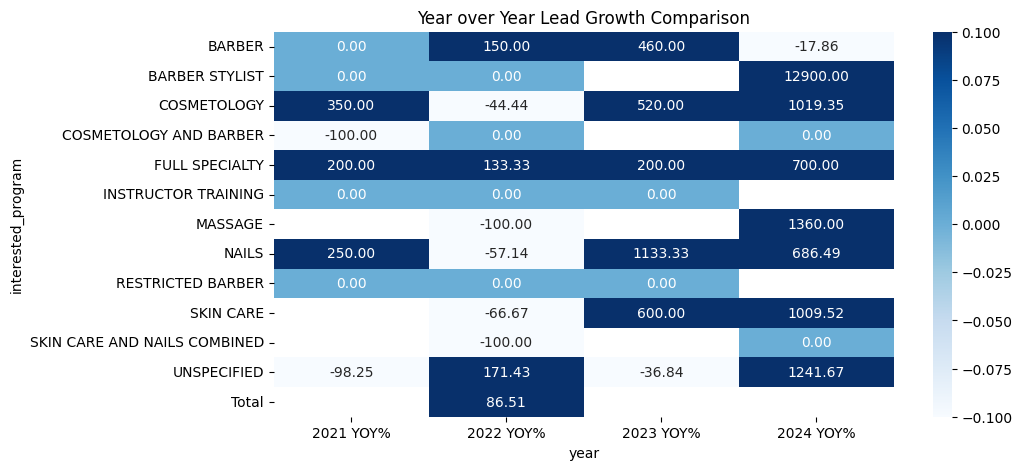

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(year_group.loc[:, year_group.columns.map(str).str.endswith('YOY%')].fillna(0),
            annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Year over Year Lead Growth Comparison")
plt.show()
